# Base model for node classification task

### 1. Load Data and View

In [19]:
import os
import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.sparse as sp
import torch
from torch import Tensor
import torch_geometric
from torch_geometric.utils import to_networkx
import networkx as nx
from networkx.algorithms import community

In [20]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [1]:
from torch_geometric.datasets import Planetoid

# Load the CORA dataset
dataset = Planetoid(root='/tmp/Cora', name='Cora')

Processing...
Done!
/home/unique/Documents/Projects/Watermark_GNN/gnn/lib/python3.12/site-packages/torch_geometric/io/fs.py:215: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.


In [4]:
# Access the first graph object
data = dataset[0]

print(type(dataset))
print(type(data))

<class 'torch_geometric.datasets.planetoid.Planetoid'>
<class 'torch_geometric.data.data.Data'>


In [5]:
data

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

In [9]:
print(f'The number of nodes:',data.num_nodes)
print(f'The number of nodes:',data.num_edges)

The number of nodes: 2708
The number of nodes: 10556


In [10]:
print(f'Has isolated nodes: {data.has_isolated_nodes()}')  # False
print(f'Has self-loops: {data.has_self_loops()}')  # False
print(f'Is undirected: {data.is_undirected()}')  # True

Has isolated nodes: False
Has self-loops: False
Is undirected: True


In [15]:
edge_index = data.edge_index.numpy()
print(edge_index.shape)

edge_index # 2D array: 1st D shows the node, 2nd D shows which node is it connected to

(2, 10556)


array([[ 633, 1862, 2582, ...,  598, 1473, 2706],
       [   0,    0,    0, ..., 2707, 2707, 2707]])

In [23]:
edge_example = edge_index[:, np.where(edge_index[0]==30)[0]]
edge_example

array([[  30,   30,   30,   30,   30,   30],
       [ 697,  738, 1358, 1416, 2162, 2343]])

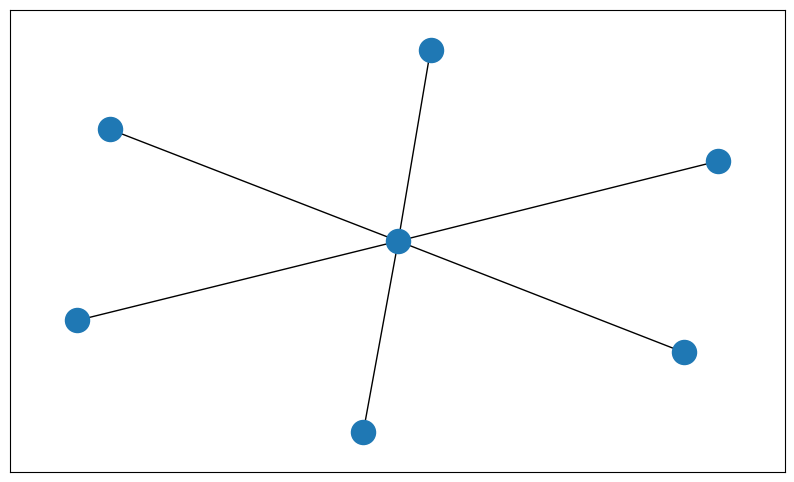

In [24]:
node_example = np.unique(edge_example.flatten())
plt.figure(figsize=(10, 6))
G = nx.Graph()
G.add_nodes_from(node_example)
G.add_edges_from(list(zip(edge_example[0], edge_example[1])))
nx.draw_networkx(G, with_labels=False)

threshold 0.011821204285186553


/home/unique/Documents/Projects/Watermark_GNN/gnn/lib/python3.12/site-packages/networkx/drawing/nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


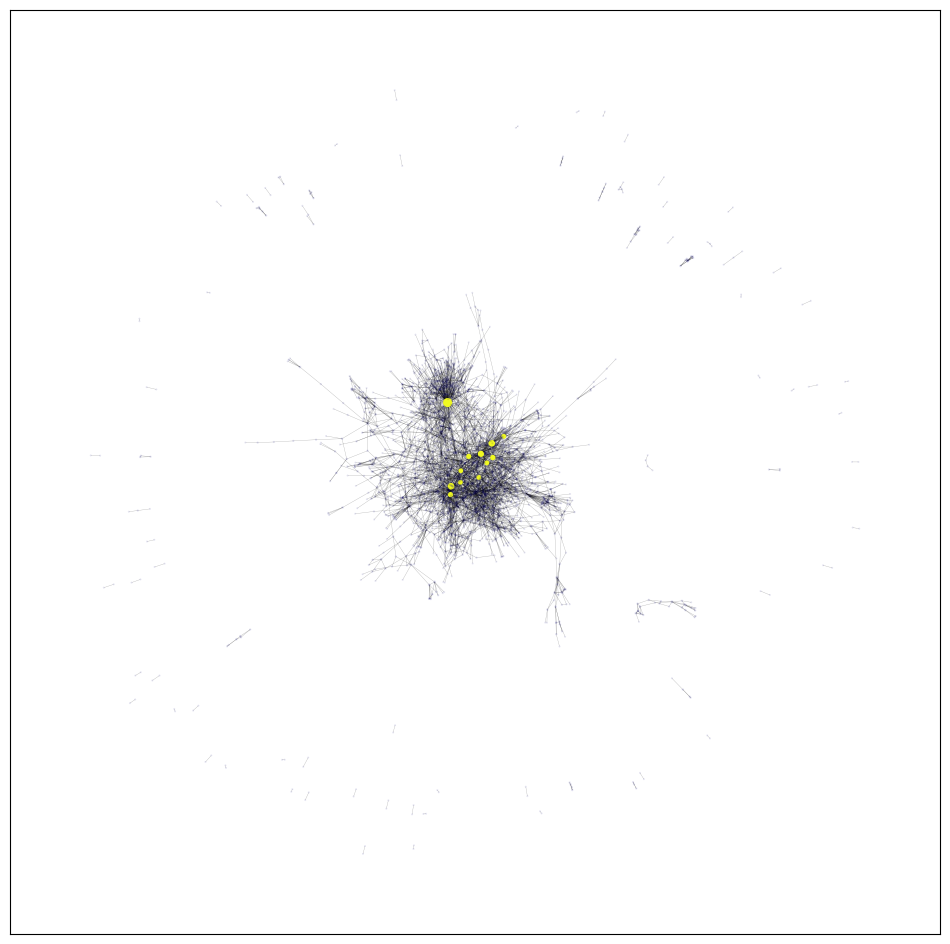

In [25]:
G = to_networkx(data, to_undirected=True)
pos = nx.spring_layout(G, seed=42)
cent = nx.degree_centrality(G)
node_size = list(map(lambda x: x * 500, cent.values()))
cent_array = np.array(list(cent.values()))
threshold = sorted(cent_array, reverse=True)[10]
print("threshold", threshold)
cent_bin = np.where(cent_array >= threshold, 1, 0.1)
plt.figure(figsize=(12, 12))
nodes = nx.draw_networkx_nodes(G, pos, node_size=node_size,
                               cmap=plt.cm.plasma,
                               node_color=cent_bin,
                               nodelist=list(cent.keys()),
                               alpha=cent_bin)
edges = nx.draw_networkx_edges(G, pos, width=0.25, alpha=0.3)
plt.show()